# Task 6.4 - Supervised Machine Learning: Regression

## Wine Reviews Dataset

In [1]:
# Import libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Define path

In [4]:
path = r'/Users/cassystunkel/Documents/Wine Analysis'

In [5]:
# Import dataset

In [6]:
df = pd.read_csv(os.path.join(path, 'Data Sets', 'Prepared Data', 'wine_data_no_outliers.csv'))

In [7]:
# Check columns

In [8]:
df.columns

Index(['Unnamed: 0', 'country', 'points', 'price', 'province', 'variety',
       'price_missing', 'Price category'],
      dtype='object')

In [9]:
# Check for missing values

In [11]:
df.isnull().sum()

Unnamed: 0        0
country           0
points            0
price             0
province          0
variety           0
price_missing     0
Price category    0
dtype: int64

In [12]:
# Extreme values already removed previously, and no true duplicates are present

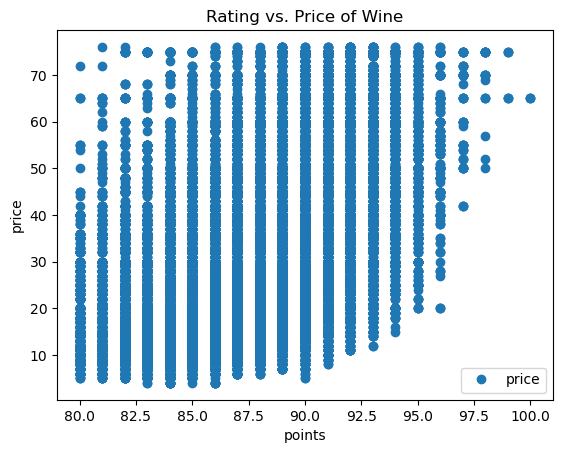

In [13]:
# Create a scatterplot using matplotlib for another look at how 'price' and 'points' variables plot against each other.

df.plot(x = 'points', y='price',style='o')
plt.title('Rating vs. Price of Wine')  
plt.xlabel('points')  
plt.ylabel('price')  
plt.show()

## Hypothesis to explore:

### Prive vs. Rating:
- Null Hypothesis: There is no significant difference in ratings between expensive and inexpensive wines.
- Alternative Hypothesis: Expensive wines have higher ratings compared to inexpensive wines.

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['points'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [15]:
X

array([[96],
       [95],
       [95],
       ...,
       [91],
       [90],
       [90]])

In [16]:
y

array([[65.],
       [66.],
       [73.],
       ...,
       [20.],
       [52.],
       [15.]])

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Create a regression object.

regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

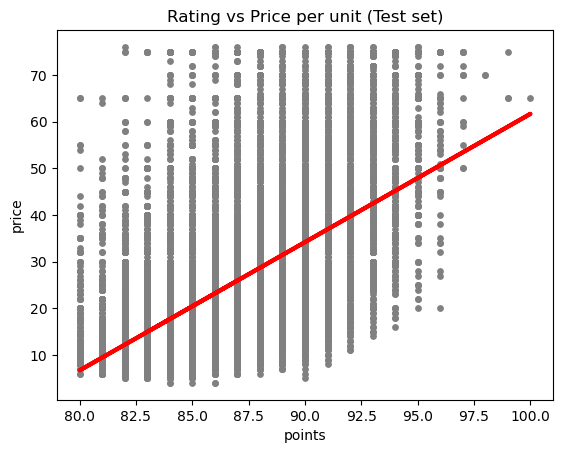

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rating vs Price per unit (Test set)')
plot_test.xlabel('points')
plot_test.ylabel('price')
plot_test.show()

The line appears to fit fairly well, although the values are honestly all over the board in terms of points vs price. While there seems to be a moderate relationship between price and points, neither of the two variables appear to have a significant impact on the other.

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [25]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.74945533]]
Mean squared error:  176.18076281029175
R2 score:  0.28522002231028687


In [26]:
y_predicted

array([[25.92560487],
       [25.92560487],
       [12.17832823],
       ...,
       [28.6750602 ],
       [42.42233684],
       [14.92778355]])

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,13.0,25.925605
1,15.0,25.925605
2,11.0,12.178328
3,30.0,34.173971
4,27.0,34.173971
5,50.0,25.925605
6,35.0,20.426694
7,38.0,39.672882
8,26.0,34.173971
9,12.0,28.675060


There's definitely a big difference between the actual and predicted y values, proving that the model isn't doing a great job of explaining th relationship between 'price' and 'points'. The relationship does not follow a single, straight regression line. This rules out my hypothesis 'Expensive wines have higher ratings compared to inexpensive wines' pointing toward my null hypothesis 'There is no significant difference in ratings between expensive and inexpensive wines' to be a more accurate statement.

Bias could have impact on this dataset, being that reviews are subject to personal taste. Wine reviews and ratings are subjective and may vary depending on individual preferences and biases of reviewers. As a result, the dataset may contain subjective information that may not be consistent across reviewers.